<a href="https://colab.research.google.com/github/Mostafa-Rawash/AI/blob/main/Clustering%20using%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [13]:
df = pd.read_csv("./sample_data/california_housing_train.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


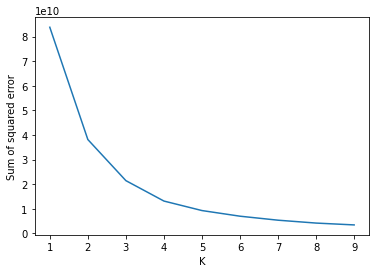

In [14]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['total_rooms','total_bedrooms']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


Text(0, 0.5, 'total_bedrooms')

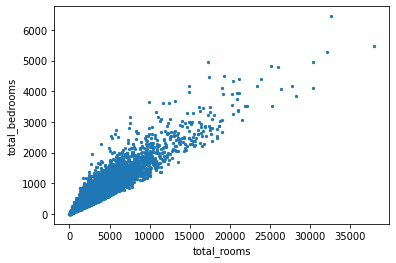

In [15]:
plt.scatter(df.total_rooms,df.total_bedrooms ,s=5)
plt.xlabel('total_rooms')
plt.ylabel('total_bedrooms')


In [16]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['total_rooms','total_bedrooms']])
df['cluster']=y_predicted


array([2, 2, 3, ..., 1, 1, 3], dtype=int32)

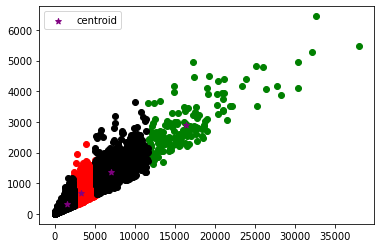

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.total_rooms,df1['total_bedrooms'],color='green')
plt.scatter(df2.total_rooms,df2['total_bedrooms'],color='red')
plt.scatter(df3.total_rooms,df3['total_bedrooms'],color='black')
plt.scatter(df4.total_rooms,df4['total_bedrooms'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


In [19]:
scaler = MinMaxScaler()

scaler.fit(df[['total_bedrooms']])
df['total_bedrooms'] = scaler.transform(df[['total_bedrooms']])

scaler.fit(df[['total_rooms']])
df['total_rooms'] = scaler.transform(df[['total_rooms']])


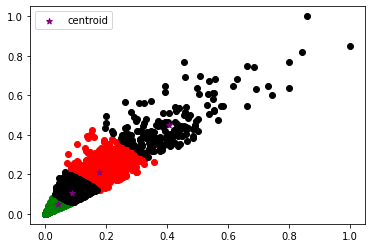

In [20]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['total_rooms','total_bedrooms']])
y_predicted
df['cluster']=y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.total_rooms,df1['total_bedrooms'],color='green')
plt.scatter(df2.total_rooms,df2['total_bedrooms'],color='red')
plt.scatter(df3.total_rooms,df3['total_bedrooms'],color='black')
plt.scatter(df4.total_rooms,df4['total_bedrooms'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()